In [1]:
import hyperspy.api as hs
import particlespy.api as ps
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import wget
from zipfile import ZipFile

C:\Users\Tom Slater\anaconda3\envs\particlespy_270423\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 11}

matplotlib.rc('font', **font)

In [3]:
%matplotlib notebook

In [4]:
wget.download('https://zenodo.org/records/11147031/files/au_minimacs_data.zip','1.zip')
with ZipFile('1.zip') as z:
    z.extractall()

100% [......................................................................] 362681426 / 362681426

In [5]:
au147_folder = "au_minimacs_data/Au147 A2"
au_minimacs_folder = "au_minimacs_data/Au miniMACS A2"

In [6]:
au147_filelist = []
for filename in glob.glob(au147_folder+'/*8MX*'):
    au147_filelist.append(hs.load(filename))

In [7]:
au_minimacs_filelist = []
for filename in glob.glob(au_minimacs_folder+'/*8MX*'):
    au_minimacs_filelist.append(hs.load(filename))

In [10]:
params = ps.parameters()
params.generate(threshold='li',min_size=10,gaussian=15)

In [11]:
params.segment

{'threshold': 'li',
 'watershed': False,
 'watershed_size': 0,
 'watershed_erosion': 0,
 'invert': False,
 'min_size': 10,
 'rb_kernel': 0,
 'gaussian': 15,
 'local_size': 1}

In [12]:
particles = ps.particle_list()
for file in au147_filelist:
    ps.particle_analysis(file,params,particles)

In [13]:
particles_minimacs = ps.particle_list()
for file in au_minimacs_filelist:
    ps.particle_analysis(file,params,particles_minimacs)

In [14]:
def add_atom_number(particle, one_atom_intensity):
    val = round(particle.properties['intensity']['value'] / one_atom_intensity)
    particle.set_property('number of atoms', val, None)
    val_third = val**(1/3)
    particle.set_property('N^1/3', val_third, None)

In [15]:
for particle in particles.list:
    add_atom_number(particle, 4.1E6)

In [16]:
for particle in particles_minimacs.list:
    add_atom_number(particle, 4.1E6)

In [17]:
def graph(formula, x_range, label, c):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y, label=label, color=c)

<IPython.core.display.Javascript object>


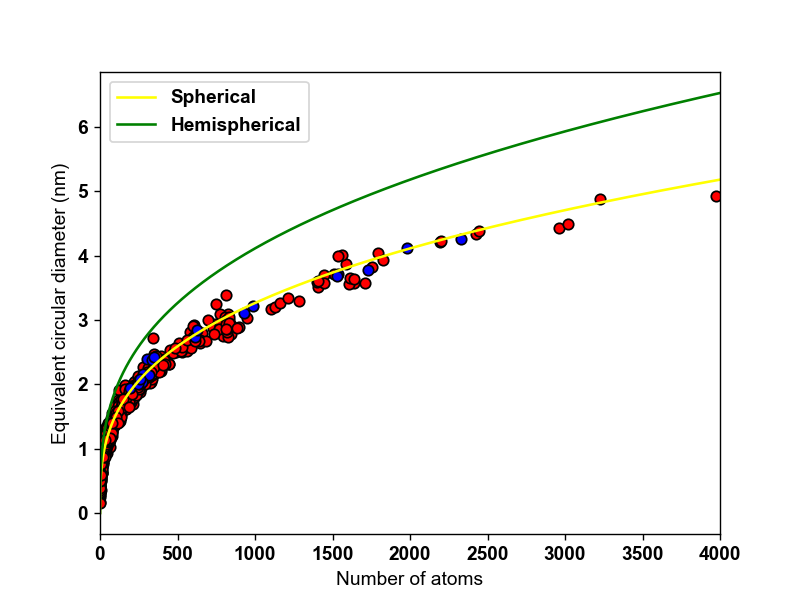

In [18]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'b', 'g'])))
ps.plot([particles_minimacs,particles],['number of atoms','equivalent circular diameter'],edgecolors='black')
graph('0.3264*(x**(1/3))', np.arange(0, 4000, 0.1), 'Spherical', 'yellow')
graph('0.3264*((2*x)**(1/3))', np.arange(0, 4000, 0.1), 'Hemispherical', 'green')
axis = plt.gca()
plt.xlim(0,4000)
axis.legend()